# Table of contents

- [Gather](#gather)
    - [Enhanced Archive](#gather_twitter_archive)
    - [Tweepy Data](#gather_tweepy)
    - [Image Prediction](#gather_image_prediction) 
    
- [Assess](#assess)
    - [Enhanced Archive](#assess_archive)
    - [Tweepy Data](#asses_tweepy_data)
    - [Image Prediction](#assess_image_prediction)
    - [Quality](#quality)
        - [Enhanced Archive](#quality_archive)
        - [Tweepy Data](#quality_tweepy_data)
        - [Image Prediction](#quality_image_prediction)
    - [Tidiness](#Tidiness)
        - [Tweepy Data](#tidiness_tweepy_data)
        - [Image Prediction](#tidiness_image_prediction)
- [Clean](#clean)
    - [Enhanced Archive](#clean_archive)
    - [Tweepy Data](#clean_tweepy_data)
    - [Image Prediction](#clean_image_prediction)
- [Analysis](#analysis)    

# Gather <a class="anchor" id="gather"></a>

In [421]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

## Gather Enhanced  Archive <a name="gather_twitter_archive"></a>

In [422]:
# read in this given file which is manually saved on this jupyter server
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

## Gather Tweepy Data <a class="anchor" id="gather_tweepy"></a>

In [4]:
# set up keys
consumer_key = "####"
consumer_secret = "###"
access_token = "###"
access_secret = "###"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [4]:
#get the tweet ID's to query from the df_archive dataframe
tweet_ids = df_archive.tweet_id

In [5]:
#check to see what datatype this list is
tweet_ids.dtype

dtype('int64')

In [6]:
#convert the datatype of the ID's into string so it can be passed into the api.get_status() method
tweet_ids = tweet_ids.astype(str)
len(tweet_ids)

2356

In [7]:
#confirm that the data type has been changed from interger to string
tweet_ids.dtype

dtype('O')

In [674]:
#run a twitter API search for the tweets by its tweet ID
#create a list and append the tweets into it
tweets = []
#create a dictionary for failed tweet ID lookups
fail = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for id in tweet_ids:
        try:
            tweet = api.get_status(id,
                                   tweet_mode= 'extended',
                                   wait_on_rate_limit_notify=True)
            tweets.append(tweet)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            print('we are on id:', len(tweets))
        except tweepy.TweepError as e:
            print('fail')
            fail[id] = e
            pass


we are on id: 1
we are on id: 2
we are on id: 3
we are on id: 4
we are on id: 5
we are on id: 6
we are on id: 7
we are on id: 8
we are on id: 9
we are on id: 10
we are on id: 11
we are on id: 12
we are on id: 13
we are on id: 14
we are on id: 15
we are on id: 16
we are on id: 17
we are on id: 18
we are on id: 19
fail
we are on id: 20
we are on id: 21
we are on id: 22
we are on id: 23
we are on id: 24
we are on id: 25
we are on id: 26
we are on id: 27
we are on id: 28
we are on id: 29
we are on id: 30
we are on id: 31
we are on id: 32
we are on id: 33
we are on id: 34
we are on id: 35
we are on id: 36
we are on id: 37
we are on id: 38
we are on id: 39
we are on id: 40
we are on id: 41
we are on id: 42
we are on id: 43
we are on id: 44
we are on id: 45
we are on id: 46
we are on id: 47
we are on id: 48
we are on id: 49
we are on id: 50
we are on id: 51
we are on id: 52
we are on id: 53
we are on id: 54
we are on id: 55
we are on id: 56
we are on id: 57
we are on id: 58
we are on id: 59
w

In [738]:
len(tweets)

2331

In [739]:
len(fail)

25

## Gather Image Prediction <a name="gather_image_prediction"></a>

In [428]:
# programmatically download the image-predictictions.tsv from udacity server using the given link
import requests 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

In [429]:
# get filename
if url.find('/'):
    filename = url.rsplit('/', 1)[1]
    print (filename)

image-predictions.tsv


In [430]:
# write file from requsts library
with open(filename, 'wb') as file:
    file.write(r.content)

In [431]:
# load file and read as tsv
df_prediction = pd.read_csv(filename, delimiter='\t' )

In [432]:
df_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

# Assess <a class="anchor" id="assess"></a> 

## Assess Enhanced Archive <a class="anchor" id="assess_archive"></a>

In [433]:
#take a look at the columns
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [434]:
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [435]:
# take a look at how many nulls are in the 'in_reply_to_user_id' column
df_archive[df_archive.in_reply_to_user_id.isnull()].count()

tweet_id                      2278
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2278
source                        2278
text                          2278
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2274
rating_numerator              2278
rating_denominator            2278
name                          2278
doggo                         2278
floofer                       2278
pupper                        2278
puppo                         2278
dtype: int64

In [436]:
# how many unique sources are there and what are their frequencies
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [437]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [438]:
df_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [439]:
df_archive.duplicated().sum()

0

In [440]:
df_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

## Assess Tweepy Data <a class="anchor" id="assess_tweepy_data"></a> 

In [441]:
# read the resulting tweet_json.txt file line by line into a dataframe

In [442]:
# load json data and store it in a list
data=[]

with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))
        
#create a dataframe from json data
df_tweepy = pd.DataFrame(data)

In [443]:
df_tweepy.count()

contributors                        0
coordinates                         0
created_at                       2331
display_text_range               2331
entities                         2331
extended_entities                2059
favorite_count                   2331
favorited                        2331
full_text                        2331
geo                                 0
id                               2331
id_str                           2331
in_reply_to_screen_name            77
in_reply_to_status_id              77
in_reply_to_status_id_str          77
in_reply_to_user_id                77
in_reply_to_user_id_str            77
is_quote_status                  2331
lang                             2331
place                               1
possibly_sensitive               2197
possibly_sensitive_appealable    2197
quoted_status                      24
quoted_status_id                   26
quoted_status_id_str               26
quoted_status_permalink            26
retweet_coun

In [444]:
# we need the tweet ID column to join the tables
# the additional columns that would be interesting to look at are:
# favorite_count, retweet_count and full_text
# create new dataframe containing only the columns desired

df_tweepy = df_tweepy[['id_str', 'favorite_count', 'retweet_count', 'full_text']]
df_tweepy.head()

id_str  favorite_count  retweet_count  \
0  892420643555336193           34816           7294   
1  892177421306343426           30154           5452   
2  891815181378084864           22692           3592   
3  891689557279858688           38074           7486   
4  891327558926688256           36369           8046   

                                           full_text  
0  This is Phineas. He's a mystical boy. Only eve...  
1  This is Tilly. She's just checking pup on you....  
2  This is Archie. He is a rare Norwegian Pouncin...  
3  This is Darla. She commenced a snooze mid meal...  
4  This is Franklin. He would like you to stop ca...

In [445]:
# check for nulls
df_tweepy.isnull().sum()

id_str            0
favorite_count    0
retweet_count     0
full_text         0
dtype: int64

In [446]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id_str            2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
dtypes: int64(2), object(2)
memory usage: 72.9+ KB


In [447]:
df_tweepy.describe()

favorite_count  retweet_count
count     2331.000000    2331.000000
mean      7268.736594    2566.803518
std      11292.037643    4341.891371
min          0.000000       1.000000
25%       1257.000000     520.000000
50%       3148.000000    1195.000000
75%       8883.000000    2972.000000
max     149516.000000   73597.000000

In [448]:
df_tweepy.duplicated().sum()

0

## Assess Image Prediction <a class="anchor" id="assess_image_prediction"></a> 

In [449]:
df_prediction.duplicated().sum()

0

In [450]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [451]:
df_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [452]:
df_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

## Quality <a class="anchor" id="quality"></a> 


### Archive Data <a class="anchor" id="quality_archive"></a>
- timestamp should be datetime
- tweet_id should be string
- remove retweets
- drop unused columns
- clean dog stage data and combine into 1 column

### Tweepy Data <a class="anchor" id="quality_tweepy_data"></a>
- extract rating from full_text
- test more regex examples to try and capture dog name from text

### Image Prediction <a class="anchor" id="quality_image_prediction"></a>
- tweet_id should be string

## Tidiness <a class="anchor" id="tidiness"></a>

### Archive Data <a class="anchor" id="quality_archive"></a>
- melt dog_stage to make into 1 variable

### Tweepy Data <a class="anchor" id="tidiness_tweepy_data"></a>
- combine combine with archive data

### Image Prediction <a class="anchor" id="tidiness_image_prediction"></a>
- combine with archive and tweepy

# Clean <a class="anchor" id="clean"></a>

In [453]:
archive_clean = df_archive.copy()
tweepy_clean = df_tweepy.copy()
prediction_clean = df_prediction.copy()

## Clean Enhanced Archive <a class="anchor" id="clean_archive"></a>

- timestamp should be datetime
- tweet_id should be string
- remove replies
- remove retweets
- drop unused columns
- combine dog stage into 1 column

### Define 
- convert timestamp to a datetime format by using pandas to_datetime method
- convert tweet_id to string format using astype(str) method

### Clean 

In [454]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

### Test

In [455]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Define
- remove replies by creating a dataframe called not_replies and define it by listing all the tweets that are not null in the "in_reply_to_user_id" column. Then redfine archive_clean as this dataframe

### Clean

In [456]:
not_replies = archive_clean[archive_clean.in_reply_to_user_id.isnull()]
archive_clean = not_replies

### Test

In [457]:
archive_clean.count()

tweet_id                      2278
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2278
source                        2278
text                          2278
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2274
rating_numerator              2278
rating_denominator            2278
name                          2278
doggo                         2278
floofer                       2278
pupper                        2278
puppo                         2278
dtype: int64

In [458]:
archive_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [459]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1)

### Define
- remove retweets by creating a new dataframe called not_retweets and define it by selecting the non null values in the "retweeted_status_id" column. Then redefine archive_clean as this dataframe

### Clean

In [460]:
not_retweets = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = not_retweets

### Test

In [461]:
archive_clean.count()

tweet_id                      2097
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                     2097
source                        2097
text                          2097
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2094
rating_numerator              2097
rating_denominator            2097
name                          2097
doggo                         2097
floofer                       2097
pupper                        2097
puppo                         2097
dtype: int64

### Define
- drop empty columns by selecting them by name and using pandas .drop() method

### Clean

In [462]:
archive_clean = archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                       'retweeted_status_user_id', 'retweeted_status_timestamp'])

### Test

In [463]:
archive_clean.count()

tweet_id              2097
timestamp             2097
source                2097
text                  2097
expanded_urls         2094
rating_numerator      2097
rating_denominator    2097
name                  2097
doggo                 2097
floofer               2097
pupper                2097
puppo                 2097
dtype: int64

### Define 
- combine dog stages into 1 column by using pandas pd.melt() function
- drop the new column created
- sort by dog_stage then drop duplicates based on tweet_id
- change dog_stage into categorical datatype

### Clean

In [464]:
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                                       'rating_numerator', 'rating_denominator', 'name'],
                var_name='dogs',
                value_name='dog_stage')

In [465]:
# notice this creates an explosion of data, now we have over 8000 rows, so we must drop the rows we dont need
archive_clean

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
19    888078434458587136 2017-07-20 16:49:33   
20    887705289381826560 2017-07-19 16:06:48   
21    887517139158093824 2017-07-19 03:39:09   
22    887473957103951883 2017-07-19 00:47:34   
23    887343217045368832 2017-07-18 16:08:03   
24    887101392804085760 2017-07-18 00:07:08   
25    886983233522544640 2017-07-17 16:17:36   
26    886736880519319552 2017-07-16 23:58:41   
27    886680336477933568 2017-07-16 20:14:00   
28    886366144734445568 2017-07-15 23:25:31   
29    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
8358  666411507551481857 2015-11-17 00:24:19   
8359  666407126856765440 2015-11-17 00:06:54   
8360  666396247373291520 2015-11-16 23:23:41   
8361  666373753744588802 2015-11-16 21:54:18   
8362  666362758909284353 2015-11-16 21:10:36   
8363  666353288456101888 2015-11-16 20:32:58   
8364  666345417576210432 2015-11-16 20:01:42   
8365  666337882303524864 2015-11-16 19:31:45   
8366  666293911632134144 2015-11-16 16:37:02   
8367  666287406224695296 2015-11-16 16:11:11   
8368  666273097616637952 2015-11-16 15:14:19   
8369  666268910803644416 2015-11-16 14:57:41   
8370  666104133288665088 2015-11-16 04:02:55   
8371  666102155909144576 2015-11-16 03:55:04   
8372  666099513787052032 2015-11-16 03:44:34   
8373  666094000022159362 2015-11-16 03:22:39   
8374  666082916733198337 2015-11-16 02:38:37   
8375  666073100786774016 2015-11-16 01:59:36   
8376  666071193221509120 2015-11-16 01:52:02   
8377  666063827256086533 2015-11-16 01:22:45   
8378  666058600524156928 2015-11-16 01:01:59   
8379  666057090499244032 2015-11-16 00:55:59   
8380  666055525042405380 2015-11-16 00:49:46   
8381  666051853826850816 2015-11-16 00:35:11   
8382  666050758794694657 2015-11-16 00:30:50   
8383  666049248165822465 2015-11-16 00:24:50   
8384  666044226329800704 2015-11-16 00:04:52   
8385  666033412701032449 2015-11-15 23:21:54   
8386  666029285002620928 2015-11-15 23:05:30   
8387  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

In [466]:
# drop the dogs column
archive_clean = archive_clean.drop('dogs', axis=1)
len(archive_clean)

8388

In [467]:
archive_clean.duplicated().sum()

5944

In [468]:
# sort by dog_stage then drop duplicated rows
archive_clean = archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [469]:
# change dog_stage into categorical
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

### Test

In [470]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 149.7+ KB


In [471]:
archive_clean.dog_stage.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

In [472]:
archive_clean.sample(5)

tweet_id           timestamp  \
3504  683857920510050305 2016-01-04 03:50:08   
3028  726887082820554753 2016-05-01 21:32:40   
2833  752917284578922496 2016-07-12 17:27:23   
2971  737678689543020544 2016-05-31 16:14:39   
5361  700151421916807169 2016-02-18 02:54:41   

                                                 source  \
3504  <a href="http://twitter.com/download/iphone" r...   
3028  <a href="http://twitter.com/download/iphone" r...   
2833  <a href="http://twitter.com/download/iphone" r...   
2971  <a href="http://twitter.com/download/iphone" r...   
5361  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
3504  Meet Sadie. She fell asleep on the beach and h...   
3028  This is Blitz. He's a new dad struggling to co...   
2833  This is Grizzie. She's a semi-submerged Bahrai...   
2971  We only rate dogs. Pls stop sending in non-can...   
5361  If a pupper gave that to me I'd probably start...   

                                          expanded_urls  rating_numerator  \
3504  https://twitter.com/dog_rates/status/683857920...                10   
3028  https://twitter.com/dog_rates/status/726887082...                10   
2833  https://twitter.com/dog_rates/status/752917284...                11   
2971  https://twitter.com/dog_rates/status/737678689...                11   
5361  https://twitter.com/dog_rates/status/700151421...                11   

      rating_denominator     name dog_stage  
3504                  10    Sadie      None  
3028                  10    Blitz      None  
2833                  10  Grizzie      None  
2971                  10     None      None  
5361                  10     None    pupper

## Clean Tweepy Data <a class="anchor" id="clean_tweepy_data"></a>

- extract rating from full_text
- extract dog name from full_text
- rename id_str to "tweet_id"

In [473]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id_str            2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
dtypes: int64(2), object(2)
memory usage: 72.9+ KB


### Define
- get rating from full text
- split into numerator and denominator
- convert into float data type

### Clean

In [474]:
tweepy_clean['rating'] = tweepy_clean.full_text.str.extract('(\d+\.?\d*?\/\d+)')

In [475]:
# split ratings into numerator and denominator
tweepy_clean['numerator'], tweepy_clean['denominator'] = tweepy_clean.rating.str.split('/', 1).str

In [476]:
tweepy_clean

id_str  favorite_count  retweet_count  \
0     892420643555336193           34816           7294   
1     892177421306343426           30154           5452   
2     891815181378084864           22692           3592   
3     891689557279858688           38074           7486   
4     891327558926688256           36369           8046   
5     891087950875897856           18340           2698   
6     890971913173991426           10679           1741   
7     890729181411237888           58649          16366   
8     890609185150312448           25253           3742   
9     890240255349198849           28800           6317   
10    890006608113172480           27790           6357   
11    889880896479866881           25276           4315   
12    889665388333682689           43341           8653   
13    889638837579907072           24382           3866   
14    889531135344209921           13734           1949   
15    889278841981685760           22766           4612   
16    888917238123831296           26337           3879   
17    888804989199671297           23112           3672   
18    888554962724278272           17825           2984   
19    888078434458587136           19730           3007   
20    887705289381826560           27415           4683   
21    887517139158093824           41920          10193   
22    887473957103951883           62018          15573   
23    887343217045368832           30418           9131   
24    887101392804085760           27745           5167   
25    886983233522544640           31390           6618   
26    886736880519319552           10806           2745   
27    886680336477933568           20334           3876   
28    886366144734445568           19104           2734   
29    886267009285017600             105              3   
...                  ...             ...            ...   
2301  666411507551481857             387            281   
2302  666407126856765440              98             30   
2303  666396247373291520             151             72   
2304  666373753744588802             166             75   
2305  666362758909284353             684            489   
2306  666353288456101888             189             63   
2307  666345417576210432             260            128   
2308  666337882303524864             172             80   
2309  666293911632134144             446            304   
2310  666287406224695296             130             57   
2311  666273097616637952             156             69   
2312  666268910803644416              92             32   
2313  666104133288665088           13044           5693   
2314  666102155909144576              69             11   
2315  666099513787052032             139             56   
2316  666094000022159362             151             65   
2317  666082916733198337             100             41   
2318  666073100786774016             278            138   
2319  666071193221509120             133             52   
2320  666063827256086533             424            186   
2321  666058600524156928             103             49   
2322  666057090499244032             260            116   
2323  666055525042405380             391            207   
2324  666051853826850816            1077            735   
2325  666050758794694657             119             51   
2326  666049248165822465              92             37   
2327  666044226329800704             256            120   
2328  666033412701032449             105             38   
2329  666029285002620928             117             41   
2330  666020888022790149            2334            441   

                                              full_text rating numerator  \
0     This is Phineas. He's a mystical boy. Only eve...  13/10        13   
1     This is Tilly. She's just checking pup on you....  13/10        13   
2     This is Archie. He is a rare Norwegian Pouncin...  12/10        12   
3     This is Darla. She commenced a snooze mid meal...

In [477]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
id_str            2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
rating            2331 non-null object
numerator         2331 non-null object
denominator       2331 non-null object
dtypes: int64(2), object(5)
memory usage: 127.6+ KB


In [478]:
# convert numerator and denominator into float and integer respectively
tweepy_clean['numerator'] = tweepy_clean['numerator'].astype(float)
tweepy_clean['denominator'] = tweepy_clean['denominator'].astype(int)
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
id_str            2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
rating            2331 non-null object
numerator         2331 non-null float64
denominator       2331 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 127.6+ KB


In [479]:
# display the frequency of each denominator found
tweepy_clean.denominator.value_counts()

10     2309
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: denominator, dtype: int64

In [480]:
# drop all denominators that arent 10
tweepy_clean = tweepy_clean[tweepy_clean['denominator'] == 10]

In [481]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 2330
Data columns (total 7 columns):
id_str            2309 non-null object
favorite_count    2309 non-null int64
retweet_count     2309 non-null int64
full_text         2309 non-null object
rating            2309 non-null object
numerator         2309 non-null float64
denominator       2309 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 144.3+ KB


In [482]:
# check to see frequency of ratings now after some rows have been removed
tweepy_clean.rating.value_counts()

12/10       552
11/10       463
10/10       458
13/10       339
9/10        156
8/10        102
7/10         53
14/10        51
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
0/10          2
15/10         2
9.75/10       2
420/10        2
11.27/10      1
007/10        1
13.5/10       1
11.26/10      1
666/10        1
182/10        1
9.5/10        1
1776/10       1
17/10         1
Name: rating, dtype: int64

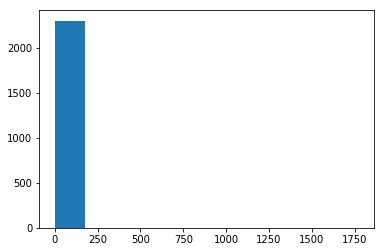

In [483]:
# the majority of rating are within 17/10. Any other ratings will skew the data so we should consider dropping them
# using a histogram we can visualize this
x = tweepy_clean.numerator
plt.hist(x);

In [484]:
# drop the rating with numerators above 17
under_17 = tweepy_clean[tweepy_clean['numerator'] < 17]
under_17.count()

id_str            2303
favorite_count    2303
retweet_count     2303
full_text         2303
rating            2303
numerator         2303
denominator       2303
dtype: int64

In [485]:
tweepy_clean = under_17

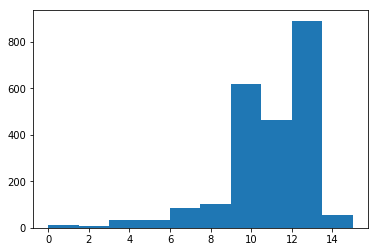

In [486]:
# check to see how distribution looks now
x = tweepy_clean.numerator
plt.hist(x);

### Test

In [487]:
tweepy_clean.numerator.value_counts()

12.00    552
11.00    463
10.00    458
13.00    339
9.00     156
8.00     102
7.00      54
14.00     51
5.00      35
6.00      32
3.00      19
4.00      15
2.00       9
1.00       8
0.00       2
15.00      2
9.75       2
11.27      1
9.50       1
13.50      1
11.26      1
Name: numerator, dtype: int64

In [488]:
#investigate weird ratings
investigate = tweepy_clean[tweepy_clean['numerator']==11.27]
location = investigate.index
investigate

id_str  favorite_count  retweet_count  \
744  778027034220126208            6385           1545   

                                             full_text    rating  numerator  \
744  This is Sophie. She's a Jubilant Bush Pupper. ...  11.27/10      11.27   

     denominator  
744           10

In [489]:
#take a closer look at the full text
tweepy_clean.loc[location[0]].full_text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [490]:
# look up using tweet_id
url = 'twitter.com/dog_rates/status/' + investigate.id_str
url

744    twitter.com/dog_rates/status/778027034220126208
Name: id_str, dtype: object

### Define
- Extract Dog Name using regex 

### Clean

In [491]:
tweepy_clean['name_string'] = tweepy_clean.full_text.str.extract('([Tt]his\sis\s\w+|\s?[Mm]eet\s\w+|[Ss]ay\shello\to\s\w+\s[and,&]?\s?\w+?|[Ff]eaturing\s)')

In [492]:
# show the name_strings extraceted
tweepy_clean.name_string.value_counts()

This is a               45
This is Penny            9
This is Bo               9
This is Lucy             9
This is Cooper           9
This is Tucker           9
This is Oliver           9
This is Charlie          8
This is Lola             7
This is the              7
This is Buddy            7
This is Bailey           6
This is an               6
This is Oscar            6
This is Scout            6
this is a                6
This is Bella            6
This is Louis            5
This is very             5
This is Gus              5
This is Leo              5
This is Koda             5
This is Alfie            5
This is Finn             5
This is Oakley           4
This is just             4
This is Milo             4
This is Bruce            4
This is Jeffrey          4
This is Clark            4
                        ..
This is Ginger           1
Meet Olive               1
Meet Herb                1
featuring                1
Meet Nugget              1
This is Deacon           1
M

In [493]:
# for how many tweets were we unable to extract a name?
tweepy_clean[tweepy_clean['name_string'].isnull()].count()

id_str            809
favorite_count    809
retweet_count     809
full_text         809
rating            809
numerator         809
denominator       809
name_string         0
dtype: int64

In [494]:
# extract dog_name from string
tweepy_clean['dog_name'] = tweepy_clean.name_string.str.split().str[-1]

In [495]:
# show a sample of tweets to visually scan for any other cleaning assesments
tweepy_clean.sample(10)

id_str  favorite_count  retweet_count  \
1769  677328882937298944            3449           1410   
240   845098359547420673               0           7195   
2137  669393256313184256             326             66   
31    886054160059072513               0             95   
2220  667885044254572545             760            423   
888   757597904299253760               0            287   
864   759943073749200896            5749           1996   
2121  669923323644657664             212             53   
852   761292947749015552            4346           1049   
620   793271401113350145            8537           2336   

                                              full_text rating  numerator  \
1769  This is Derek. All the dogs adore Derek. He's ...  10/10       10.0   
240   RT @dog_rates: This is Bungalo. She uses that ...  12/10       12.0   
2137  Meet Ronduh. She's a Finnish Checkered Blitzkr...  10/10       10.0   
31    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...  12/10       12.0   
2220  Meet Stu. Stu has stacks on stacks and an eye ...  10/10       10.0   
888   RT @jon_hill987: @dog_rates There is a cunning...  11/10       11.0   
864   Here's a wicked fast pupper. 12/10 camera coul...  12/10       12.0   
2121  This is a spotted Lipitor Rumpelstiltskin name...  10/10       10.0   
852   Meet Bonaparte. He's pupset because it's cloud...  11/10       11.0   
620   Meet Dave. It's his favorite day of the year. ...  12/10       12.0   

      denominator      name_string   dog_name  
1769           10    This is Derek      Derek  
240            10  This is Bungalo    Bungalo  
2137           10      Meet Ronduh     Ronduh  
31             10              NaN        NaN  
2220           10         Meet Stu        Stu  
888            10              NaN        NaN  
864            10              NaN        NaN  
2121           10        This is a          a  
852            10   Meet Bonaparte  Bonaparte  
620            10        Meet Dave       Dave

In [496]:
# take a look at the tweets that start with "This is a"
tweepy_clean[tweepy_clean['name_string'] == "This is a"]

id_str  favorite_count  retweet_count  \
978   747885874273214464            2815            923   
980   747816857231626240            4649           1107   
993   746872823977771008            5755           2026   
1025  743222593470234624            5946           1820   
1169  717537687239008257            5512           1742   
1183  715733265223708672            4455           1601   
1337  703079050210877440            7057           2919   
1344  702539513671897089            2762            912   
1475  692187005137076224            2416            777   
1712  679530280114372609            4533           1960   
1760  677644091929329666            1759            758   
1828  675706639471788032             607             87   
1829  675534494439489536            1725            377   
1852  675109292475830276            2608           1038   
1853  675047298674663426             983            292   
1898  674082852460433408             711            151   
1916  673715861853720576            3265           1883   
1930  673636718965334016            1026            332   
1969  672604026190569472            1017            361   
2009  671743150407421952             696            214   
2041  671147085991960577             609            200   
2091  670427002554466305             481            146   
2100  670361874861563904             301             59   
2103  670303360680108032             402            118   
2121  669923323644657664             212             53   
2128  669661792646373376             746            387   
2136  669564461267722241             358            108   
2166  668955713004314625             251             65   
2173  668815180734689280             511            234   
2193  668507509523615744             297             94   
2210  668171859951755264             444            168   
2224  667861340749471744             226             74   
2230  667773195014021121             211             47   
2239  667538891197542400             186             59   
2248  667470559035432960             231             88   
2262  667177989038297088             175             50   
2279  666983947667116034            2325            877   
2286  666781792255496192             347            171   
2289  666701168228331520             388            193   
2302  666407126856765440              98             30   
2309  666293911632134144             446            304   
2322  666057090499244032             260            116   
2325  666050758794694657             119             51   
2327  666044226329800704             256            120   
2329  666029285002620928             117             41   

                                              full_text rating  numerator  \
978   This is a mighty rare blue-tailed hammer sherk...   8/10        8.0   
980   Viewer discretion is advised. This is a terrib...   4/10        4.0   
993   This is a carrot. We only rate dogs. Please on...  11/10       11.0   
1025  This is a very rare Great Alaskan Bush Pupper....  12/10       12.0   
1169  People please. This is a Deadly Mediterranean ...  11/10       11.0   
1183  This is a taco. We only rate dogs. Please only...  10/10       10.0   
1337  This is a Butternut Cumberfloof. It's not wind...  11/10       11.0   
1344  This is a Wild Tuscan Poofwiggle. Careful not ...  12/10       12.0   
1475  This is a rare Arctic Wubberfloof. Unamused by...  12/10       12.0   
1712  Guys this really needs to stop. We've been ove...   7/10        7.0   
1760  This is a dog swinging. I really enjoyed it so...  11/10       11.0   
1828  This is a Sizzlin Menorah spaniel from Brookly...  10/10       10.0   
1829  Seriously guys?! Only send in dogs. I only rat...  11/10       11.0   
1852  C'mon guys. We've been over this. We only rate...   9/10        9.0   
1853  This is a fluffy albino Bacardi Columbia mix. ...  11/10       11.0   
1898  This is a Sagitariot Baklava mix. Loves her ne...  11/10       11

In [497]:
# if dog name is 'a', 'an', 'such', 'the' change it to none
tweepy_clean['dog_name'].replace(['a', 'an', 'such','the'],'None', inplace=True)

In [498]:
# fill NaN dog_names as "none"
tweepy_clean.dog_name.fillna('None', inplace=True)

### Test

In [499]:
# check to see if updated
tweepy_clean.dog_name.value_counts()

None        874
Lola         10
Tucker       10
Charlie      10
Lucy          9
Oliver        9
Cooper        9
Penny         9
Bo            9
Winston       8
Bailey        7
Buddy         7
Daisy         7
Toby          7
Stanley       6
Koda          6
Rusty         6
Jax           6
Bella         6
Oscar         6
Milo          6
Scout         6
Sadie         6
Dave          5
very          5
Chester       5
Larry         5
Finn          5
Leo           5
Louis         5
           ... 
Chadrick      1
Socks         1
Harnold       1
Rambo         1
Bruno         1
Sparky        1
Chef          1
Brandi        1
Lambeau       1
Furzey        1
Cilantro      1
Ferg          1
Lipton        1
Trip          1
Tuco          1
Rueben        1
Sundance      1
Lenox         1
Marlee        1
Loomis        1
Fabio         1
Emma          1
Billl         1
Sweets        1
Julius        1
Stefan        1
Clyde         1
Calbert       1
Molly         1
Ralphé        1
Name: dog_name, Length: 

In [500]:
# check if we have desired datatypes
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2330
Data columns (total 9 columns):
id_str            2303 non-null object
favorite_count    2303 non-null int64
retweet_count     2303 non-null int64
full_text         2303 non-null object
rating            2303 non-null object
numerator         2303 non-null float64
denominator       2303 non-null int64
name_string       1494 non-null object
dog_name          2303 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 259.9+ KB


### Define
- Look at tweets with favorite count of 0
- remove these tweets as they are retweets
- change column name: id_str into tweet_id for consistency with other tables

### Clean

In [501]:
# look at tweets with a favorite count of 0, and notice that these are all retweets as seen in prefix of its full text
# so lets drop them
tweepy_clean[tweepy_clean.favorite_count == 0]

id_str  favorite_count  retweet_count  \
31    886054160059072513               0             95   
35    885311592912609280               0          15994   
67    879130579576475649               0           5936   
72    878404777348136964               0           1109   
73    878316110768087041               0           5745   
77    877611172832227328               0             70   
90    874434818259525634               0          12672   
95    873337748698140672               0           1382   
105   871166179821445120               0           5035   
119   868639477480148993               0           1817   
125   867072653475098625               0            106   
131   866094527597207552               0           7450   
140   863471782782697472               0           2159   
152   860981674716409858               0           1923   
153   860924035999428608               0            703   
158   860177593139703809               0          27828   
164   858860390427611136               0           7360   
173   857062103051644929               0            154   
177   856330835276025856               0            613   
186   855245323840757760               0           5477   
187   855138241867124737               0             39   
196   852936405516943360               0           1850   
203   851861385021730816               0             19   
213   849668094696017920               0           4631   
221   847978865427394560               0           3045   
222   847971574464610304               0            413   
240   845098359547420673               0           7195   
254   841833993020538882               0          14142   
260   840761248237133825               0           1665   
261   840728873075638272               0          15156   
...                  ...             ...            ...   
748   777641927919427584               0           4075   
751   776819012571455488               0          13182   
754   776249906839351296               0           8780   
759   775898661951791106               0          16143   
774   773336787167145985               0           4854   
780   772615324260794368               0           3254   
791   771171053431250945               0           7153   
800   770093767776997377               0           2923   
804   769335591808995329               0           7425   
807   768909767477751808               0           2567   
811   768554158521745409               0           5589   
819   766864461642756096               0           5383   
825   766078092750233600               0           2514   
838   763167063695355904               0           2881   
846   761750502866649088               0           3744   
850   761371037149827077               0          17316   
863   760153949710192640               0             30   
872   759159934323924993               0           1110   
885   757729163776290825               0           7545   
888   757597904299253760               0            287   
903   754874841593970688               0           7552   
913   753298634498793472               0           5423   
919   752701944171524096               0           2733   
925   752309394570878976               0          15463   
988   747242308580548608               0           2756   
999   746521445350707200               0            937   
1019  743835915802583040               0           1959   
1218  711998809858043904               0            123   
2234  667550904950915073               0             29   
2235  667550882905632768               0             26   

                                              full_text rating  numerator  \
31    RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...  12/10       12.0   
35    RT @dog_rates: This is Lilly. She just paralle...  13/10       13.0   
67    RT @dog_rates: This is Emmy. She was adopted t...  14/10       14.0   
72    RT @dog_rates: Meet Shadow. In an attempt to 

### Test

In [502]:
# how many tweets dont have a favorite count of 0?
tweepy_clean = tweepy_clean[tweepy_clean.favorite_count != 0]
tweepy_clean.count()

id_str            2140
favorite_count    2140
retweet_count     2140
full_text         2140
rating            2140
numerator         2140
denominator       2140
name_string       1392
dog_name          2140
dtype: int64

In [503]:
# drop rating column
# drop name_string
tweepy_clean = tweepy_clean.drop(columns=['rating','name_string'])

In [504]:
# check for nulls
tweepy_clean.count()

id_str            2140
favorite_count    2140
retweet_count     2140
full_text         2140
numerator         2140
denominator       2140
dog_name          2140
dtype: int64

In [505]:
tweepy_clean.rename(columns ={'id_str' : 'tweet_id'}, inplace=True)

In [506]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id          2140 non-null object
favorite_count    2140 non-null int64
retweet_count     2140 non-null int64
full_text         2140 non-null object
numerator         2140 non-null float64
denominator       2140 non-null int64
dog_name          2140 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 133.8+ KB


## Clean Image Prediction <a class="anchor" id="clean_image_prediction"></a>

In [507]:
prediction_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [508]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define
- change tweet_id datatype into string

### Clean

In [509]:
prediction_clean['tweet_id'] = prediction_clean.tweet_id.astype(str)

### Test

In [510]:
# check to see if updated 
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [511]:
prediction_clean.describe()

img_num      p1_conf       p2_conf       p3_conf
count  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean      1.203855     0.594548  1.345886e-01  6.032417e-02
std       0.561875     0.271174  1.006657e-01  5.090593e-02
min       1.000000     0.044333  1.011300e-08  1.740170e-10
25%       1.000000     0.364412  5.388625e-02  1.622240e-02
50%       1.000000     0.588230  1.181810e-01  4.944380e-02
75%       1.000000     0.843855  1.955655e-01  9.180755e-02
max       4.000000     1.000000  4.880140e-01  2.734190e-01

# Tidiness

### Archive Data 
- melt dog_stage to make into 1 variable

### Tweepy Data 
- combine combine with archive data

### Image Prediction 
- combine with archive and tweepy

In [512]:
archive_clean

tweet_id           timestamp  \
2021  667405339315146752 2015-11-19 18:13:27   
2020  667435689202614272 2015-11-19 20:14:03   
2019  667437278097252352 2015-11-19 20:20:22   
2018  667443425659232256 2015-11-19 20:44:47   
2017  667453023279554560 2015-11-19 21:22:56   
2016  667455448082227200 2015-11-19 21:32:34   
2015  667470559035432960 2015-11-19 22:32:36   
2014  667491009379606528 2015-11-19 23:53:52   
2013  667495797102141441 2015-11-20 00:12:54   
2012  667502640335572993 2015-11-20 00:40:05   
2011  667509364010450944 2015-11-20 01:06:48   
2010  667517642048163840 2015-11-20 01:39:42   
2009  667524857454854144 2015-11-20 02:08:22   
2022  667393430834667520 2015-11-19 17:26:08   
2008  667530908589760512 2015-11-20 02:32:25   
2006  667538891197542400 2015-11-20 03:04:08   
2005  667544320556335104 2015-11-20 03:25:43   
2004  667546741521195010 2015-11-20 03:35:20   
2003  667549055577362432 2015-11-20 03:44:31   
2002  667724302356258817 2015-11-20 15:20:54   
2001  667728196545200128 2015-11-20 15:36:22   
2000  667766675769573376 2015-11-20 18:09:16   
1999  667773195014021121 2015-11-20 18:35:10   
1998  667782464991965184 2015-11-20 19:12:01   
1997  667793409583771648 2015-11-20 19:55:30   
1996  667801013445750784 2015-11-20 20:25:43   
1995  667806454573760512 2015-11-20 20:47:20   
1994  667832474953625600 2015-11-20 22:30:44   
2007  667534815156183040 2015-11-20 02:47:56   
2023  667369227918143488 2015-11-19 15:49:57   
...                  ...                 ...   
5362  700143752053182464 2016-02-18 02:24:13   
5313  704859558691414016 2016-03-02 02:43:09   
4948  750868782890057730 2016-07-07 01:47:22   
5526  688179443353796608 2016-01-16 02:02:19   
5938  672594978741354496 2015-12-04 01:55:13   
5328  703407252292673536 2016-02-27 02:32:12   
6355  878776093423087618 2017-06-25 00:45:22   
6835  784183165795655680 2016-10-07 00:06:50   
7044  751132876104687617 2016-07-07 19:16:47   
7124  743253157753532416 2016-06-16 01:25:36   
7031  752519690950500352 2016-07-11 15:07:30   
6431  859607811541651456 2017-05-03 03:17:27   
6445  855851453814013952 2017-04-22 18:31:02   
6724  803773340896923648 2016-11-30 01:31:12   
6616  822872901745569793 2017-01-21 18:26:02   
6633  819952236453363712 2017-01-13 17:00:21   
6795  790946055508652032 2016-10-25 16:00:09   
7112  744995568523612160 2016-06-20 20:49:19   
6732  802239329049477120 2016-11-25 19:55:35   
6402  867421006826221569 2017-05-24 16:44:18   
6605  825026590719483904 2017-01-27 17:04:02   
6603  825535076884762624 2017-01-29 02:44:34   
6815  787717603741622272 2016-10-16 18:11:26   
7009  756275833623502848 2016-07-21 23:53:04   
7158  738537504001953792 2016-06-03 01:07:16   
6303  889665388333682689 2017-07-25 01:55:32   
6305  889531135344209921 2017-07-24 17:02:04   
6374  874012996292530176 2017-06-11 21:18:31   
6779  793195938047070209 2016-10-31 21:00:23   
6856  780931614150983680 2016-09-28 00:46:20   

                                                 source  \
2021  <a href="http://twitter.com/download/iphone" r...   
2020  <a href="http://twitter.com/download/iphone" r...   
2019  <a href="http://twitter.com/download/iphone" r...   
2018  <a href="http://twitter.com/download/iphone" r...   
2017  <a href="http://twitter.com" rel="nofollow">Tw...   
2016  <a href="http://twitter.com" rel="nofollow">Tw...   
2015  <a href="http://twitter.com" rel="nofollow">Tw...   
2014  <a href="http://twitter.com" rel="nofollow">Tw...   
2013  <a href="http://twitter.com" rel="nofollow">Tw...   
2012  <a href="http://twitter.com" rel="nofollow">Tw...   
2011  <a href="http://twitter.com" rel="nofollow">Tw...   
2010  <a href="http://twitter.com" rel="nofollow">Tw...   
2009  <a href="http://twitter.com" rel="nofollow">Tw...   
2022  <a href="http://twitter.com/download/iphone" r...   
2008  <a href="http://twitter.com" rel="nofollow">Tw...   
2006  <a href="http://twitter.com" rel="nofollow">Tw...   
2005  <a href="http://twitter.com" r

In [513]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2021 to 6856
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(5)
memory usage: 149.7+ KB


In [514]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id          2140 non-null object
favorite_count    2140 non-null int64
retweet_count     2140 non-null int64
full_text         2140 non-null object
numerator         2140 non-null float64
denominator       2140 non-null int64
dog_name          2140 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 133.8+ KB


### Define
- combine archive with tweepy

### Clean

In [515]:
# combine archive with tweepy
df_master = pd.merge(archive_clean, tweepy_clean, on = 'tweet_id')

### Test

In [516]:
# list the columns of this combined dataframe
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'full_text', 'numerator',
       'denominator', 'dog_name'],
      dtype='object')

In [517]:
df_master.count()

tweet_id              2071
timestamp             2071
source                2071
text                  2071
expanded_urls         2068
rating_numerator      2071
rating_denominator    2071
name                  2071
dog_stage             2071
favorite_count        2071
retweet_count         2071
full_text             2071
numerator             2071
denominator           2071
dog_name              2071
dtype: int64

In [518]:
df_master.head()

tweet_id           timestamp  \
0  667405339315146752 2015-11-19 18:13:27   
1  667435689202614272 2015-11-19 20:14:03   
2  667437278097252352 2015-11-19 20:20:22   
3  667443425659232256 2015-11-19 20:44:47   
4  667453023279554560 2015-11-19 21:22:56   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com" rel="nofollow">Tw...   

                                                text  \
0  This is Biden. Biden just tripped... 7/10 http...   
1            Ermergerd 12/10 https://t.co/PQni2sjPsm   
2  Never seen this breed before. Very pointy pup....   
3  Exotic dog here. Long neck. Weird paws. Obsess...   
4  Meet Cupcake. I would do unspeakable things fo...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/667405339...                 7   
1  https://twitter.com/dog_rates/status/667435689...                12   
2  https://twitter.com/dog_rates/status/667437278...                10   
3  https://twitter.com/dog_rates/status/667443425...                 6   
4  https://twitter.com/dog_rates/status/667453023...                11   

   rating_denominator     name dog_stage  favorite_count  retweet_count  \
0                  10    Biden      None             429            203   
1                  10     None      None             282             79   
2                  10     None      None             411            213   
3                  10     None      None             706            521   
4                  10  Cupcake      None             289             80   

                                           full_text  numerator  denominator  \
0  This is Biden. Biden just tripped... 7/10 http...        7.0           10   
1            Ermergerd 12/10 https://t.co/PQni2sjPsm       12.0           10   
2  Never seen this breed before. Very pointy pup....       10.0           10   
3  Exotic dog here. Long neck. Weird paws. Obsess...        6.0           10   
4  Meet Cupcake. I would do unspeakable things fo...       11.0           10   

  dog_name  
0    Biden  
1     None  
2     None  
3     None  
4  Cupcake

In [519]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'full_text', 'numerator',
       'denominator', 'dog_name'],
      dtype='object')

### Define
- drop the columns that are not needed

### Clean

In [520]:
df_master.drop(columns = ['text', 'rating_numerator', 'rating_denominator', 'name'], inplace=True)

### Test

In [521]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'dog_stage',
       'favorite_count', 'retweet_count', 'full_text', 'numerator',
       'denominator', 'dog_name'],
      dtype='object')

In [522]:
df_master.head()

tweet_id           timestamp  \
0  667405339315146752 2015-11-19 18:13:27   
1  667435689202614272 2015-11-19 20:14:03   
2  667437278097252352 2015-11-19 20:20:22   
3  667443425659232256 2015-11-19 20:44:47   
4  667453023279554560 2015-11-19 21:22:56   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com" rel="nofollow">Tw...   

                                       expanded_urls dog_stage  \
0  https://twitter.com/dog_rates/status/667405339...      None   
1  https://twitter.com/dog_rates/status/667435689...      None   
2  https://twitter.com/dog_rates/status/667437278...      None   
3  https://twitter.com/dog_rates/status/667443425...      None   
4  https://twitter.com/dog_rates/status/667453023...      None   

   favorite_count  retweet_count  \
0             429            203   
1             282             79   
2             411            213   
3             706            521   
4             289             80   

                                           full_text  numerator  denominator  \
0  This is Biden. Biden just tripped... 7/10 http...        7.0           10   
1            Ermergerd 12/10 https://t.co/PQni2sjPsm       12.0           10   
2  Never seen this breed before. Very pointy pup....       10.0           10   
3  Exotic dog here. Long neck. Weird paws. Obsess...        6.0           10   
4  Meet Cupcake. I would do unspeakable things fo...       11.0           10   

  dog_name  
0    Biden  
1     None  
2     None  
3     None  
4  Cupcake

In [523]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
- combine df_master with prediction_clean

### Clean

In [524]:

df_master = pd.merge(df_master, prediction_clean, on = 'tweet_id')

### Test

In [525]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'dog_stage',
       'favorite_count', 'retweet_count', 'full_text', 'numerator',
       'denominator', 'dog_name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [526]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1944
Data columns (total 22 columns):
tweet_id          1945 non-null object
timestamp         1945 non-null datetime64[ns]
source            1945 non-null object
expanded_urls     1945 non-null object
dog_stage         1945 non-null category
favorite_count    1945 non-null int64
retweet_count     1945 non-null int64
full_text         1945 non-null object
numerator         1945 non-null float64
denominator       1945 non-null int64
dog_name          1945 non-null object
jpg_url           1945 non-null object
img_num           1945 non-null int64
p1                1945 non-null object
p1_conf           1945 non-null float64
p1_dog            1945 non-null bool
p2                1945 non-null object
p2_conf           1945 non-null float64
p2_dog            1945 non-null bool
p3                1945 non-null object
p3_conf           1945 non-null float64
p3_dog            1945 non-null bool
dtypes: bool(3), category(1), d

# Save to CSV

In [527]:
# save as csv called "twitter_archive_master.csv"
df_master = df_master.copy()
df_master.to_csv('twitter_archive_master.csv', index=False)

# Analysis <a class="anchor" id="analysis"></a>

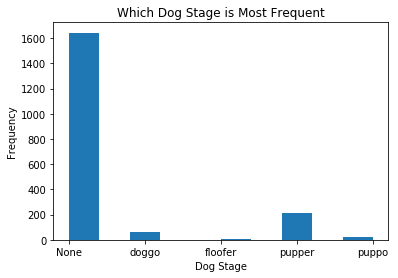

In [528]:
# visualize which dog stage is most frequent
x = df_master.dog_stage.sort_values()
plt.title('Which Dog Stage is Most Frequent')
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.hist(x);

In [529]:
x.value_counts()

None       1643
pupper      209
doggo        62
puppo        23
floofer       8
Name: dog_stage, dtype: int64

The majority of tweets dont have a dog stage mentioned, but for the ones that do, we can see the majority are puppers, then doggos, puppos then floofs.  

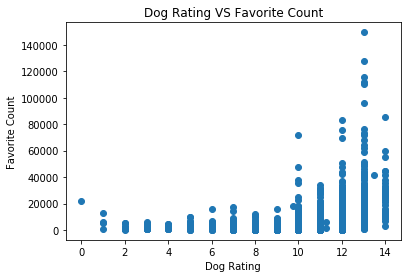

In [530]:
# plot the favorite count versus the dog rating 
f = df_master.favorite_count
n = df_master.numerator
plt.title('Dog Rating VS Favorite Count')
plt.xlabel('Dog Rating')
plt.ylabel('Favorite Count')
plt.scatter(n,f);

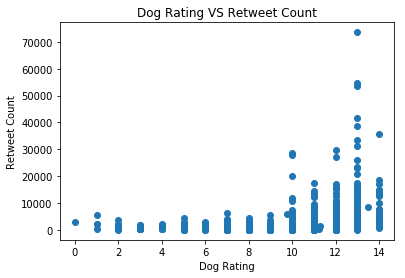

In [531]:
# plot retweet count versus the dog rating
r = df_master.retweet_count
plt.title('Dog Rating VS Retweet Count')
plt.xlabel('Dog Rating')
plt.ylabel('Retweet Count')
plt.scatter(n,r);

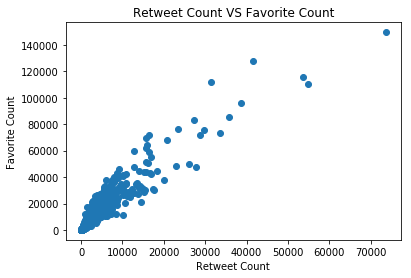

In [532]:
# plot retweet versus favorite
plt.title('Retweet Count VS Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.scatter(r,f);

In [533]:
# find the correlation coefficient
correlation_matrix = np.corrcoef(r, f)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.86136581963334802

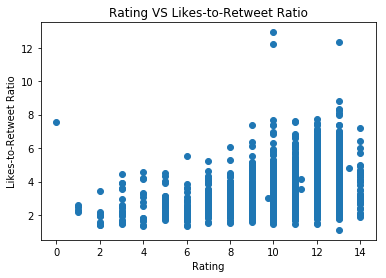

In [534]:
# compare the number of retweets to number of favorite counts
# create a ratio called "likes_to_retweet_ratio"

df_master['likes_to_retweet_ratio'] = df_master.favorite_count/df_master.retweet_count

# plot the likes_to_retweet_ratio vs rating
likes_to_retweet_ratio = df_master['likes_to_retweet_ratio']

plt.title('Rating VS Likes-to-Retweet Ratio')
plt.xlabel('Rating')
plt.ylabel('Likes-to-Retweet Ratio')
plt.scatter(n, likes_to_retweet_ratio);

This visualizes that the higher the rating the higher the chance that the tweet will have more favorite counts than retweets.

This also implies that the lower the rating, the more retweets that tweet will get relative to its favorite count

In [535]:
# on average how many like to retweets do these tweets get?
df_master['likes_to_retweet_ratio'].mean()

3.5369350888899755

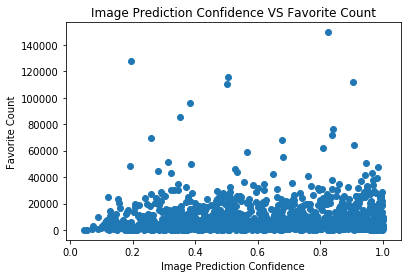

In [536]:
# select rows that have an image prediction of a dog breed as true 
# and compare the confidence of image with the favorite count
dog_favorite = df_master.query('p1_dog == True').favorite_count
dog_confidence = df_master.query('p1_dog == True').p1_conf

plt.title('Image Prediction Confidence VS Favorite Count')
plt.xlabel('Image Prediction Confidence')
plt.ylabel('Favorite Count')
plt.scatter(dog_confidence, dog_favorite);

In [537]:
# find the r-squared value to see how strong this correlation is
correlation_matrix = np.corrcoef(dog_confidence, dog_favorite)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.0042883380742698507

This shows a very weak positive correleation, meaning the higher the confidence of the image prediction algorithm, the higher favorite count we can expect for a tweet. However this value which ranges from -1 to +1 is very close to zero which implies there is no correlation

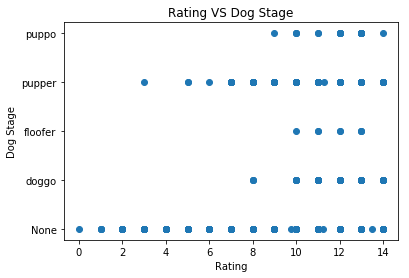

In [538]:
# explore dog stage versus rating
stage = df_master.dog_stage

plt.title('Rating VS Dog Stage')
plt.xlabel('Rating')
plt.ylabel('Dog Stage')
plt.scatter(n, stage);

It appears that puppos are consistently the highest rated.
Some puppers may be naughty and hence have lower ratings.
Floofs never rate below 10 but also havent rated above 14.
Doggos have a bit a range of ratings from 8 to 14

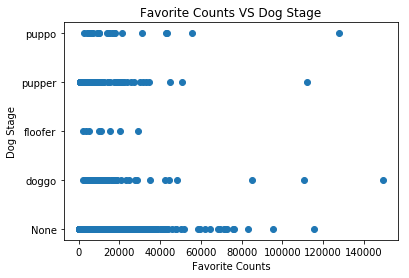

In [539]:
# explore dog stage versus favorite counts
stage = df_master.dog_stage

plt.title('Favorite Counts VS Dog Stage')
plt.xlabel('Favorite Counts')
plt.ylabel('Dog Stage')
plt.scatter(f, stage);


In [540]:
# find the tweet with the highest favorite count
df_master['favorite_count'].max()

149516

In [541]:
df_master[df_master['favorite_count']==149516]

tweet_id           timestamp  \
1701  744234799360020481 2016-06-18 18:26:18   

                                                 source  \
1701  <a href="http://twitter.com/download/iphone" r...   

                                          expanded_urls dog_stage  \
1701  https://twitter.com/dog_rates/status/744234799...     doggo   

      favorite_count  retweet_count  \
1701          149516          73597   

                                              full_text  numerator  \
1701  Here's a doggo realizing you can stand in a po...       13.0   

      denominator          ...                            p1   p1_conf  \
1701           10          ...            Labrador_retriever  0.825333   

      p1_dog        p2   p2_conf  p2_dog       p3   p3_conf  p3_dog  \
1701    True  ice_bear  0.044681   False  whippet  0.018442    True   

     likes_to_retweet_ratio  
1701                2.03155  

[1 rows x 23 columns]

In [542]:
# find the tweet with the highest retweet count
df_master['retweet_count'].max()

73597

In [543]:
df_master[df_master['retweet_count']==73597]

tweet_id           timestamp  \
1701  744234799360020481 2016-06-18 18:26:18   

                                                 source  \
1701  <a href="http://twitter.com/download/iphone" r...   

                                          expanded_urls dog_stage  \
1701  https://twitter.com/dog_rates/status/744234799...     doggo   

      favorite_count  retweet_count  \
1701          149516          73597   

                                              full_text  numerator  \
1701  Here's a doggo realizing you can stand in a po...       13.0   

      denominator          ...                            p1   p1_conf  \
1701           10          ...            Labrador_retriever  0.825333   

      p1_dog        p2   p2_conf  p2_dog       p3   p3_conf  p3_dog  \
1701    True  ice_bear  0.044681   False  whippet  0.018442    True   

     likes_to_retweet_ratio  
1701                2.03155  

[1 rows x 23 columns]

*it just happens to be that the highest retweeted and highest favorited tweet in this database is a Labrador Retriever doggo with a rating of 13/10 that is learning how to swim*

In [544]:
# what is the most common breed
df_master.p1.value_counts()

golden_retriever             134
Labrador_retriever            89
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    36
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
seat_belt                     21
miniature_pinscher            21
German_shepherd               20
Siberian_husky                19
Eskimo_dog                    18
Staffordshire_bullterrier     18
Shetland_sheepdog             18
Cardigan                      17
Shih-Tzu                      17
Maltese_dog                   17
beagle                        17
Italian_greyhound             16
Rottweiler                    16
teddy                         16
Lakeland_terrier              15
kuvasz                        15
web_site                      14
          

In [545]:
# create a dataframe for the most common breed(which are golden retrievers)
golden_retrievers = df_master[df_master['p1']=='golden_retriever']
golden_retrievers

tweet_id           timestamp  \
14    667530908589760512 2015-11-20 02:32:25   
30    667211855547486208 2015-11-19 05:24:37   
44    667044094246576128 2015-11-18 18:17:59   
52    667160273090932737 2015-11-19 01:59:39   
58    667182792070062081 2015-11-19 03:29:07   
90    668286279830867968 2015-11-22 04:33:59   
92    666063827256086533 2015-11-16 01:22:45   
104   666345417576210432 2015-11-16 20:01:42   
138   876484053909872640 2017-06-18 16:57:37   
156   888804989199671297 2017-07-22 16:56:37   
157   888917238123831296 2017-07-23 00:22:39   
181   880465832366813184 2017-06-29 16:39:47   
188   882268110199369728 2017-07-04 16:01:23   
191   883117836046086144 2017-07-07 00:17:54   
192   883482846933004288 2017-07-08 00:28:19   
204   690735892932222976 2016-01-23 03:20:44   
207   690959652130045952 2016-01-23 18:09:53   
235   692568918515392513 2016-01-28 04:44:32   
289   688385280030670848 2016-01-16 15:40:14   
290   683098815881154561 2016-01-02 01:33:43   
363   685325112850124800 2016-01-08 05:00:14   
404   708810915978854401 2016-03-13 00:24:26   
414   709556954897764353 2016-03-15 01:48:55   
433   718971898235854848 2016-04-10 01:20:33   
435   719339463458033665 2016-04-11 01:41:07   
448   717537687239008257 2016-04-06 02:21:30   
461   715680795826982913 2016-03-31 23:22:53   
467   717047459982213120 2016-04-04 17:53:31   
485   702217446468493312 2016-02-23 19:44:20   
490   702684942141153280 2016-02-25 02:42:00   
...                  ...                 ...   
1663  858843525470990336 2017-05-01 00:40:27   
1668  716080869887381504 2016-04-02 01:52:38   
1674  786363235746385920 2016-10-13 00:29:39   
1677  719991154352222208 2016-04-12 20:50:42   
1681  795464331001561088 2016-11-07 03:14:10   
1688  821765923262631936 2017-01-18 17:07:18   
1702  826958653328592898 2017-02-02 01:01:21   
1707  800388270626521089 2016-11-20 17:20:08   
1717  724405726123311104 2016-04-25 01:12:38   
1724  741067306818797568 2016-06-10 00:39:48   
1728  680100725817409536 2015-12-24 19:00:23   
1761  733109485275860992 2016-05-19 01:38:16   
1774  808106460588765185 2016-12-12 00:29:28   
1777  807621403335917568 2016-12-10 16:22:02   
1795  756939218950160384 2016-07-23 19:49:07   
1813  673295268553605120 2015-12-06 00:17:55   
1827  676470639084101634 2015-12-14 18:35:43   
1831  693262851218264065 2016-01-30 02:41:58   
1832  765371061932261376 2016-08-16 02:14:15   
1836  675740360753160193 2015-12-12 18:13:51   
1848  759793422261743616 2016-07-31 16:50:42   
1856  837820167694528512 2017-03-04 00:21:08   
1862  699434518667751424 2016-02-16 03:25:58   
1896  678341075375947776 2015-12-19 22:28:09   
1902  699801817392291840 2016-02-17 03:45:29   
1903  751456908746354688 2016-07-08 16:44:23   
1906  672622327801233409 2015-12-04 03:43:54   
1916  700143752053182464 2016-02-18 02:24:13   
1926  859607811541651456 2017-05-03 03:17:27   
1941  889531135344209921 2017-07-24 17:02:04   

                                                 source  \
14    <a href="http://twitter.com" rel="nofollow">Tw...   
30    <a href="http://twitter.com/download/iphone" r...   
44    <a href="http://twitter.com/download/iphone" r...   
52    <a href="http://twitter.com/download/iphone" r...   
58    <a href="http://twitter.com/download/iphone" r...   
90    <a href="http://twitter.com/download/iphone" r...   
92    <a href="http://twitter.com/download/iphone" r...   
104   <a href="http://twitter.com/download/iphone" r...   
138   <a href="http://twitter.com/download/iphone" r...   
156   <a href="http://twitter.com/download/iphone" r...   
157   <a href="http://twitter.com/download/iphone" r...   
181   <a href="http://twitter.com/download/iphone" r...   
188   <a href="http://twitter.com/download/iphone" r...   
191   <a href="http://twitter.com/download/iphone" r...   
192   <a href="http://twitter.com/download/iphone" r...   
204   <a href="http://twitter.com/download/iphone" r...   
207   <a href="http://twitter.com/do

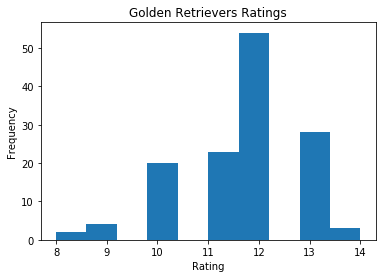

In [546]:
# plot the ratings of golden retrivers
gold_rating = golden_retrievers.numerator
plt.title('Golden Retrievers Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.hist(gold_rating);

In [547]:
# create a dataframe for the second most common breed(which are Labrador_retrievers)
labrador_retrievers = df_master[df_master['p1']=='Labrador_retriever']
labrador_retrievers

tweet_id           timestamp  \
4     667453023279554560 2015-11-19 21:22:56   
9     667502640335572993 2015-11-20 00:40:05   
65    666701168228331520 2015-11-17 19:35:19   
71    667924896115245057 2015-11-21 04:37:59   
78    668204964695683073 2015-11-21 23:10:52   
133   874680097055178752 2017-06-13 17:29:20   
136   875747767867523072 2017-06-16 16:11:53   
275   693280720173801472 2016-01-30 03:52:58   
299   684097758874210310 2016-01-04 19:43:10   
306   684460069371654144 2016-01-05 19:42:51   
318   681981167097122816 2015-12-29 23:32:35   
353   686606069955735556 2016-01-11 17:50:18   
357   684926975086034944 2016-01-07 02:38:10   
387   712097430750289920 2016-03-22 02:03:52   
389   712668654853337088 2016-03-23 15:53:42   
391   712809025985978368 2016-03-24 01:11:29   
410   709225125749587968 2016-03-14 03:50:21   
430   718613305783398402 2016-04-09 01:35:37   
445   722613351520608256 2016-04-20 02:30:23   
447   714141408463036416 2016-03-27 17:25:54   
496   698195409219559425 2016-02-12 17:22:12   
510   699323444782047232 2016-02-15 20:04:36   
551   703774238772166656 2016-02-28 02:50:28   
600   671154572044468225 2015-11-30 02:31:34   
613   670823764196741120 2015-11-29 04:37:03   
629   670780561024270336 2015-11-29 01:45:22   
651   671866342182637568 2015-12-02 01:39:53   
656   671891728106971137 2015-12-02 03:20:45   
704   669359674819481600 2015-11-25 03:39:17   
720   668528771708952576 2015-11-22 20:37:34   
...                  ...                 ...   
1426  747103485104099331 2016-06-26 16:25:26   
1444  755110668769038337 2016-07-18 18:43:07   
1463  751205363882532864 2016-07-08 00:04:50   
1465  751538714308972544 2016-07-08 22:09:27   
1468  752173152931807232 2016-07-10 16:10:29   
1535  736225175608430592 2016-05-27 15:58:54   
1546  738883359779196928 2016-06-04 00:01:35   
1549  739544079319588864 2016-06-05 19:47:03   
1568  772117678702071809 2016-09-03 17:02:54   
1584  761976711479193600 2016-08-06 17:26:19   
1588  771500966810099713 2016-09-02 00:12:18   
1600  768473857036525572 2016-08-24 15:43:39   
1609  771102124360998913 2016-08-31 21:47:27   
1623  759923798737051648 2016-08-01 01:28:46   
1637  759047813560868866 2016-07-29 15:27:55   
1644  872967104147763200 2017-06-09 00:02:31   
1647  829449946868879360 2017-02-08 22:00:52   
1680  757393109802180609 2016-07-25 01:52:43   
1700  826204788643753985 2017-01-30 23:05:46   
1701  744234799360020481 2016-06-18 18:26:18   
1740  741743634094141440 2016-06-11 21:27:17   
1746  803638050916102144 2016-11-29 16:33:36   
1783  687096057537363968 2016-01-13 02:17:20   
1790  678800283649069056 2015-12-21 04:52:53   
1842  675898130735476737 2015-12-13 04:40:46   
1875  871762521631449091 2017-06-05 16:15:56   
1908  776477788987613185 2016-09-15 17:48:25   
1910  882762694511734784 2017-07-06 00:46:41   
1923  751132876104687617 2016-07-07 19:16:47   
1943  793195938047070209 2016-10-31 21:00:23   

                                                 source  \
4     <a href="http://twitter.com" rel="nofollow">Tw...   
9     <a href="http://twitter.com" rel="nofollow">Tw...   
65    <a href="http://twitter.com/download/iphone" r...   
71    <a href="http://twitter.com/download/iphone" r...   
78    <a href="http://twitter.com/download/iphone" r...   
133   <a href="http://twitter.com/download/iphone" r...   
136   <a href="http://twitter.com/download/iphone" r...   
275   <a href="http://twitter.com/download/iphone" r...   
299   <a href="http://twitter.com/download/iphone" r...   
306   <a href="http://twitter.com/download/iphone" r...   
318   <a href="http://twitter.com/download/iphone" r...   
353   <a href="http://twitter.com/download/iphone" r...   
357   <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   
389   <a href="http://twitter.com/download/iphone" r...   
391   <a href="http://twitter.com/download/iphone" r...   
410   <a href="http://twitter.com/do

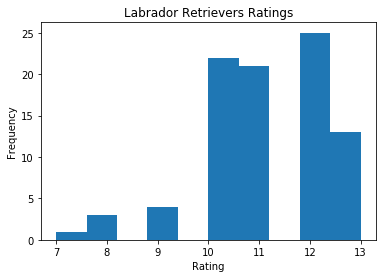

In [548]:
# plot the ratings of labrador retrivers
lab_rating = labrador_retrievers.numerator
plt.title('Labrador Retrievers Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.hist(lab_rating);

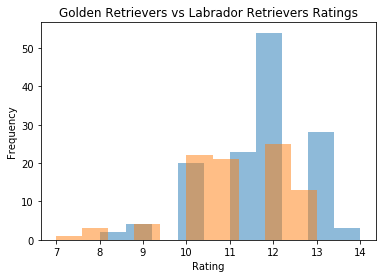

In [549]:
# combine into one chart
gold_rating = golden_retrievers.numerator
lab_rating = labrador_retrievers.numerator

plt.title('Golden Retrievers vs Labrador Retrievers Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.hist(gold_rating, alpha=0.5)
plt.hist(lab_rating, alpha=0.5)
plt.show();

Notice how Labradors never rated above 13. It seems that the majority of Golden Retrieversrate between 11 and 13